In [1]:
# Importing necessary packages
from keras.datasets import mnist
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Importing model
from ann_model import Model, Layer

2021-12-19 16:56:10.276298: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-19 16:56:10.276322: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Getting data
data = mnist.load_data()

# Splitting to train and test
X_train = np.array(data[0][0]).reshape(-1, 784)[:1000, :] / 255
X_test = np.array(data[1][0]).reshape(-1, 784)[:300, :] / 255

y_train = OneHotEncoder().fit_transform(data[0][1].reshape(-1, 1))[:1000, :]
y_test = OneHotEncoder().fit_transform(data[1][1].reshape(-1, 1))[:300, :]

In [3]:
# Building model
model = Model(learning_rate=0.07)
model.add(Layer(128, activation_function='relu'))
model.add(Layer(64, activation_function='relu'))
model.add(Layer(10, activation_function='softmax'))

In [4]:
# Fitting model
model.fit(X_train, y_train)

EPOCH 1
Accuracy: 0.499


EPOCH 2
Accuracy: 0.715


EPOCH 3
Accuracy: 0.845


EPOCH 4
Accuracy: 0.88


EPOCH 5
Accuracy: 0.926


EPOCH 6
Accuracy: 0.948


EPOCH 7
Accuracy: 0.962


EPOCH 8
Accuracy: 0.979


EPOCH 9
Accuracy: 0.983


EPOCH 10
Accuracy: 0.984




In [5]:
# Predictions
predictions = model.predict(X_test)

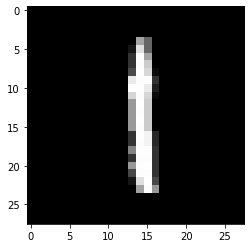

Prediction: 1


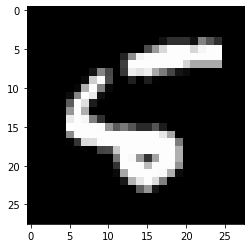

Prediction: 5


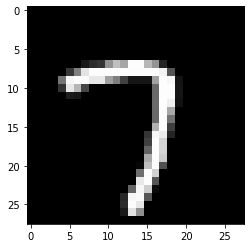

Prediction: 7


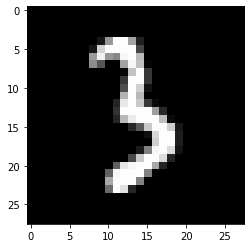

Prediction: 3


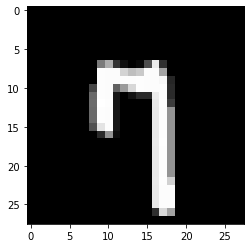

Prediction: 7


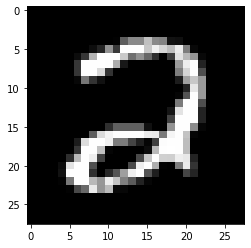

Prediction: 2


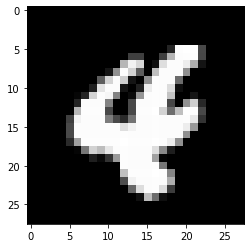

Prediction: 4


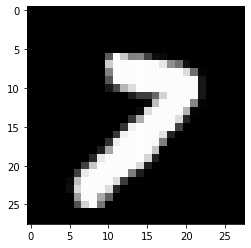

Prediction: 7


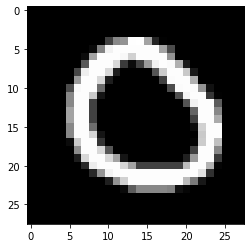

Prediction: 0


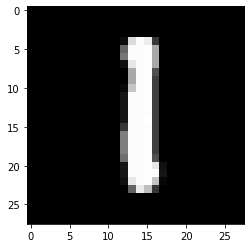

Prediction: 1


In [6]:
plt.gray()
for _ in range(10):
    random_no = np.random.randint(y_test.shape[0])
    plt.imshow(X_test[random_no].reshape(28, 28))
    plt.show()
    print(f"Prediction: {np.argmax(y_test[random_no])}")